In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from random import randint
from random import random
from random import uniform
from math import exp
from math import log

**1. Implement simulated annealing for the travelling salesman. As
proposal, permute two random stations on the route. As
cooling scheme, you can use e.g. Tk = 1/√(1 + k) or
Tk = − log(k + 1), feel free to experiment with different
choices. The route must end where it started. Initialise with a
random permutation of stations.**

**(a) Have input be positions in the plane of the n stations.
Let the cost of going i 7→ j be the Euclidian distance
between station i and j.
Plot the resulting route in the plane.
Debug with stations on a circle.**

In [8]:
def plotTSP(paths, points, idx=-1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for point in paths[idx]:
        x.append(point[0])
        y.append(point[1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads
    a_scale = float(max(x))/float(100)

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(-10, 110)
    plt.ylim(-10, 110)
    plt.savefig('ex7b_map.png')

In [3]:
class sa():
    '''Simple Simulated Annealing
    '''

    def __init__(self, func, x0, step_max=2500, t_min=0, t_max=100, bounds=[], alpha=None, damping=1):


        # initialize starting conditions
        self.t = t_max
        self.t_max = t_max
        self.t_min = t_min
        self.step_max = step_max
        self.hist = []

        self.cost_func = func
        self.x0 = x0
        self.bounds = bounds[:]
        self.damping = damping
        self.current_state = self.x0
        self.current_energy = func(self.x0)
        self.best_state = self.current_state
        self.best_energy = self.current_energy

        self.get_neighbor = self.move_combinatorial
        self.update_t = self.cooling_A



        # begin optimizing
        self.step, self.accept = 1, 0
        while self.step < self.step_max and self.t >= self.t_min and self.t>0:

            # get neighbor
            proposed_neighbor = self.get_neighbor()

            # check energy level of neighbor
            E_n = self.cost_func(proposed_neighbor)
            dE = E_n - self.current_energy

            # determine if we should accept the current neighbor
            if random() < self.safe_exp(-dE / self.t):
                self.current_energy = E_n
                self.current_state = proposed_neighbor[:]
                self.accept += 1

            # check if the current neighbor is best solution so far
            if E_n < self.best_energy:
                self.best_energy = E_n
                self.best_state = proposed_neighbor[:]

            # persist some info for later
            self.hist.append([
                self.step,
                self.t,
                self.current_energy,
                self.best_energy,
                self.current_state])

            # update some stuff
            self.t = self.update_t(self.step)
            self.step += 1

        # generate some final stats
        self.acceptance_rate = self.accept / self.step


    def move_combinatorial(self):
        '''Swaps two random nodes along path
        Not the most efficient, but it does the job...
        '''
        p0 = randint(0, len(self.current_state)-1)
        p1 = randint(0, len(self.current_state)-1)

        neighbor = self.current_state[:]
        neighbor[p0], neighbor[p1] = neighbor[p1], neighbor[p0]

        return neighbor


    def results(self):
        print('+------------------------ RESULTS -------------------------+')
        print(f'  initial temp: {self.t_max}')
        print(f'    final temp: {self.t:0.6f}')
        print(f'     max steps: {self.step_max}')
        print(f'    final step: {self.step}\n')
        print(f'  final energy: {self.best_energy:0.6f}')
        print('+-------------------------- END ---------------------------+\n')

    # cooling function A
    def cooling_A(self, step):
        return 1 / np.sqrt(1 + step)
    
    # cooling function B
    def cooling_B(self, step):
        return -np.log(1 + step)


    def safe_exp(self, x):
        try: return exp(x)
        except: return 0
    
    
    def visualize_routes(self, idx=-1):
        """
        Visualize the TSP route with matplotlib.
        """
        plotTSP([val[4] for val in self.hist], self.x0, idx=idx)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.hist))], [val[2] for val in self.hist])
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.savefig('ex7_learn.png')

In [4]:
def generate_random_coords(num_nodes):
    return [[uniform(0, 100), uniform(0, 100)] for i in range(num_nodes)]

def calc_euclidean(p1, p2):    
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def cost_fn(seq):
    result = 0
    for i in range(len(seq)-1):
        result += calc_euclidean(seq[i], seq[i+1])
    return result

x0 = generate_random_coords(20)
opt = sa(cost_fn, x0) 
opt.results()
print(opt.best_state)

+------------------------ RESULTS -------------------------+
  initial temp: 100
    final temp: 0.020000
     max steps: 2500
    final step: 2500

  final energy: 401.670203
+-------------------------- END ---------------------------+

[[23.980098373868653, 95.33212163589818], [49.78374094552497, 94.36725029535008], [75.13000252105012, 98.31138130570035], [91.0104603780914, 80.9343093031155], [71.86247613739636, 80.96382104073948], [60.447467351586766, 87.05451301094305], [46.78414824695104, 88.53935624478618], [35.81906089395967, 64.87172913517989], [35.95674841103491, 47.83177594088649], [42.18687856401725, 32.18715363919683], [55.89382233579381, 21.908969928226284], [65.54462198562253, 19.73534757326898], [85.04383522324379, 26.77698229142892], [69.58779219777507, 65.61999906060637], [28.75596056523402, 52.8415637935649], [19.484966615893885, 34.00959391190293], [33.58836293189472, 24.280866512745813], [46.90253225851072, 22.114405174163732], [59.59511788647621, 10.716853976145401

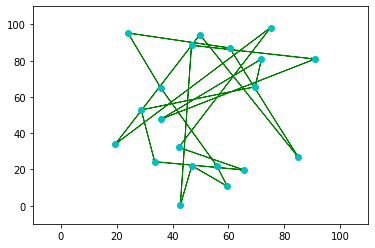

In [5]:
opt.visualize_routes(idx=0)

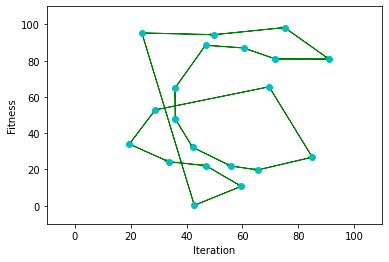

In [6]:
opt.visualize_routes()

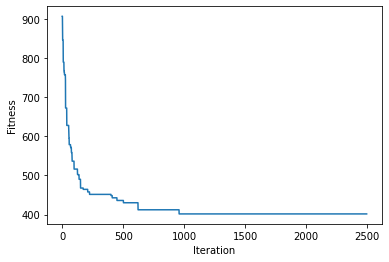

In [7]:
opt.plot_learning()

**(b) Then modify your progamme to work with costs directly
and apply it to the cost matrix from the course homepage.**

In [32]:
class sa():
    '''Simple Simulated Annealing
    '''

    def __init__(self, func, x0, step_max=2500, t_min=0, t_max=100, bounds=[], alpha=None, damping=1):

        # Cost matrix for part 2
        self.costs_matrix=[
            [0,225,110,8,257,22,83,231,277,243,94,30,4,265,274,250,87,83,271,86],
            [255,0,265,248,103,280,236,91,3,87,274,265,236,8,24,95,247,259,28,259],
            [87,236,0,95,248,110,25,274,250,271,9,244,83,250,248,280,29,26,239,7],
            [8,280,83,0,236,28,91,239,280,259,103,23,6,280,244,259,95,87,230,84],
            [268,87,239,271,0,244,275,9,84,25,244,239,275,83,110,24,274,280,84,274],
            [21,265,99,29,259,0,99,230,265,271,87,5,22,239,236,250,87,95,271,91],
            [95,236,28,91,247,93,0,247,259,244,27,91,87,268,275,280,7,8,240,27],
            [280,83,250,261,4,239,230,0,103,24,239,261,271,95,87,21,274,255,110,280],
            [247,9,280,274,84,255,259,99,0,87,255,274,280,3,27,83,259,244,28,274],
            [230,103,268,275,23,244,264,28,83,0,268,275,261,91,95,8,277,261,84,247],
            [87,239,9,103,261,110,29,255,239,261,0,259,84,239,261,242,24,25,242,5],
            [30,255,95,30,247,4,87,274,242,255,99,0,24,280,274,259,91,83,247,91],
            [8,261,83,6,255,29,103,261,247,242,110,29,0,261,244,230,87,84,280,100],
            [242,8,259,280,99,242,244,99,3,84,280,236,259,0,27,95,274,261,24,268],
            [274,22,250,236,83,261,247,103,22,91,250,236,261,25,0,103,255,261,5,247],
            [244,91,261,255,28,236,261,29,103,9,242,261,244,87,110,0,242,236,95,259],
            [84,236,27,99,230,83,7,259,230,230,22,87,93,250,255,247,0,9,259,24],
            [91,242,28,87,250,110,6,271,271,255,27,103,84,250,271,244,5,0,271,29],
            [261,24,250,271,84,255,261,87,28,110,250,248,248,22,3,103,271,248,0,236],
            [103,271,8,91,255,91,21,271,236,271,7,250,83,247,250,271,22,27,248,0]
        ]
        
        # initialize starting conditions
        self.t = t_max
        self.t_max = t_max
        self.t_min = t_min
        self.step_max = step_max
        self.hist = []

        self.cost_func = func
        self.x0 = x0
        self.bounds = bounds[:]
        self.damping = damping
        self.current_state = self.x0
        self.current_energy = func(self.x0, self.costs_matrix, self.x0)
        self.best_state = self.current_state
        self.best_energy = self.current_energy

        self.get_neighbor = self.move_combinatorial
        self.update_t = self.cooling_A



        # begin optimizing
        self.step, self.accept = 1, 0
        while self.step < self.step_max and self.t >= self.t_min and self.t>0:

            # get neighbor
            proposed_neighbor = self.get_neighbor()

            # check energy level of neighbor
            E_n = self.cost_func(proposed_neighbor, self.costs_matrix, self.x0)
            dE = E_n - self.current_energy

            # determine if we should accept the current neighbor
            if random() < self.safe_exp(-dE / self.t):
                self.current_energy = E_n
                self.current_state = proposed_neighbor[:]
                self.accept += 1

            # check if the current neighbor is best solution so far
            if E_n < self.best_energy:
                self.best_energy = E_n
                self.best_state = proposed_neighbor[:]

            # persist some info for later
            self.hist.append([
                self.step,
                self.t,
                self.current_energy,
                self.best_energy,
                self.current_state])

            # update some stuff
            self.t = self.update_t(self.step)
            self.step += 1

        # generate some final stats
        self.acceptance_rate = self.accept / self.step


    def move_combinatorial(self):
        '''Swaps two random nodes along path
        Not the most efficient, but it does the job...
        '''
        p0 = randint(0, len(self.current_state)-1)
        p1 = randint(0, len(self.current_state)-1)

        neighbor = self.current_state[:]
        neighbor[p0], neighbor[p1] = neighbor[p1], neighbor[p0]

        return neighbor


    def results(self):
        print('+------------------------ RESULTS -------------------------+')
        print(f'  initial temp: {self.t_max}')
        print(f'    final temp: {self.t:0.6f}')
        print(f'     max steps: {self.step_max}')
        print(f'    final step: {self.step}\n')
        print(f'   best energy: {self.best_energy:0.6f}')
        print('+-------------------------- END ---------------------------+\n')

    # cooling function A
    def cooling_A(self, step):
        return 1 / np.sqrt(1 + step)
    
    # cooling function B
    def cooling_B(self, step):
        return -np.log(1 + step)


    def safe_exp(self, x):
        try: return exp(x)
        except: return 0
    

    def visualize_routes(self, idx=-1):
        """
        Visualize the TSP route with matplotlib.
        """
        plotTSP([val[4] for val in self.hist], self.x0, idx=idx)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.hist))], [val[3] for val in self.hist])
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.savefig('ex7b_learn.png')

In [33]:
def generate_random_coords(num_nodes):
    return [[uniform(0, 100), uniform(0, 100)] for i in range(num_nodes)]

def cost_fn_matrix(seq, cost_matrix, x0):
    nodes = dict()
    for idx, val in enumerate(x0):
        nodes[val[0]] = idx
    result = 0
    for i in range(len(seq)-1):
        result += cost_matrix[nodes[seq[i][0]]][nodes[seq[i+1][0]]]
    return result

x0 = generate_random_coords(20)
opt = sa(cost_fn_matrix, x0) 
opt.results()
print(opt.best_state)

+------------------------ RESULTS -------------------------+
  initial temp: 100
    final temp: 0.020000
     max steps: 2500
    final step: 2500

   best energy: 1475.000000
+-------------------------- END ---------------------------+

[[80.20030318147407, 10.29146327273659], [24.26521086663904, 11.556586401028547], [4.078361699244315, 96.63388896883954], [73.93711851766056, 37.09861320367571], [16.6279232908748, 34.374899622249636], [98.84695162984798, 99.97247974364811], [93.49913123551059, 4.176948088431676], [68.66901910309514, 12.151454880853086], [68.66902618311458, 29.82529117894025], [35.074433826537565, 83.30170052123424], [93.76336532171354, 32.78390307036967], [20.48147919421418, 61.21226011835712], [44.45401261759949, 95.69609863732116], [49.36935561682814, 33.47347500250192], [58.14488988756173, 28.157956693950826], [5.2173970636311235, 92.43017443268349], [27.211975312107718, 68.68273429307139], [35.109942668793906, 76.72512614334408], [26.61019028528101, 55.4663574988

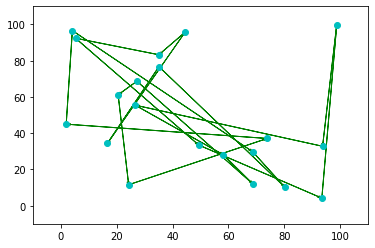

In [39]:
opt.visualize_routes(idx=0)

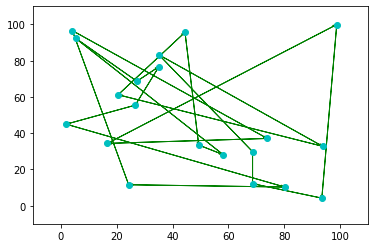

In [40]:
opt.visualize_routes()

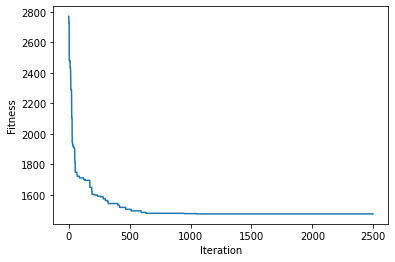

In [36]:
opt.plot_learning()

In [37]:
opt.best_energy

1475

In [38]:
opt.current_energy

1475